# Analysis

In [1]:
from common import *
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 70)

In [13]:
df = pd.read_csv("data/dow.csv", index_col=[0,1])

df_processed = (df
 .pipe(startPipeline)
 .pipe(clean)
 .pipe(trim)
 .pipe(flatten_date)
 .pipe(removeOutliers)
 .pipe(add_percent_change)
)

df_processed

startPipeline:
  runtime=0:00:00, end shape=(63, 7)
clean:
  runtime=0:00:00.001998, end shape=(62, 7)
trim:
  runtime=0:00:00.001000, end shape=(62, 1)
flatten_date:
  runtime=0:00:00.010006, end shape=(31, 4)
removeOutliers:
  runtime=0:00:00, end shape=(31, 4)
add_percent_change:
  runtime=0:00:00.002001, end shape=(31, 5)


,Start Date,End Date,Start Close,End Close,Percent Change
Symbol,,,,,
AA,1998-01-20,2021-01-14,29.530121,25.090000,-15.035904
AXP,1998-01-20,2021-01-14,17.698372,123.779999,599.386359
BA,1998-01-20,2021-01-14,27.150482,209.910004,673.135454
CAT,1998-01-20,2021-01-14,9.994546,197.399994,1875.077159
COKE,1998-01-20,2021-01-14,42.274349,258.570007,511.647517
...,...,...,...,...,...
T,1998-01-20,2021-01-14,12.724303,29.290001,130.189428
TRV,1998-01-20,2021-01-14,23.375343,142.320007,508.846704
UK,1998-01-20,2021-01-14,NaN,NaN,NaN


## Benchmark: DIA

In [14]:
def benchmark_percent_change(df):
    return df.loc["DIA"]["Percent Change"]

def print_benchmark_info(df):
    dia_pct_change = benchmark_percent_change(df)
    print(f"The Dow Jones has risen {dia_pct_change} from " \
          f"{df.loc['DIA']['Start Date']} to {df.loc['DIA']['Start Date']}")

print_benchmark_info(df_processed)

The Dow Jones has risen 549.561518336611 from 1998-01-20 to 1998-01-20


## Percent of Individual Dow Companies that Outperformed DIA

In [21]:
def outperformers(df):
    return df[df["Percent Change"] > benchmark_percent_change(df)]

def underperformers(df):
    return df[df["Percent Change"] < benchmark_percent_change(df)]

def print_outperformers_info(df):
    total_companies = len(df) - 1 # exclude DIA
    df_outperform = outperformers(df)
    total_above_dia = len(df_outperform)
    
    float_string = "%.2f" % (total_above_dia/total_companies * 100)
    avg_outperform_string = "%.2f" % df_outperform['Percent Change'].mean()
    
    print(f"{float_string}% performed better than DIA ({total_above_dia}/{total_companies})")
    print(f"{avg_outperform_string}% was the average percent change for the outperformers")
    print(f"Outperformers:\n{df_outperform.index.to_list()}")
    
print_outperformers_info(df_processed)

43.33% performed better than DIA (13/30)
906.90% was the average percent change for the outperformers
Outperformers:
['AXP', 'BA', 'CAT', 'CVX', 'DIS', 'HON', 'JNJ', 'JPM', 'MCD', 'MMM', 'MO', 'RTX', 'WMT']


(array([5., 5., 8., 3., 3., 2., 0., 1.]),
 array([ -75.08914329,  168.68164444,  412.45243217,  656.22321991,
         899.99400764, 1143.76479537, 1387.53558311, 1631.30637084,
        1875.07715857]),
 <BarContainer object of 8 artists>)

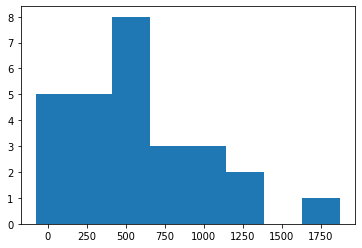

In [16]:
plt.hist(df_processed["Percent Change"], bins = 8)